<Axes: xlabel='Volume_delta'>

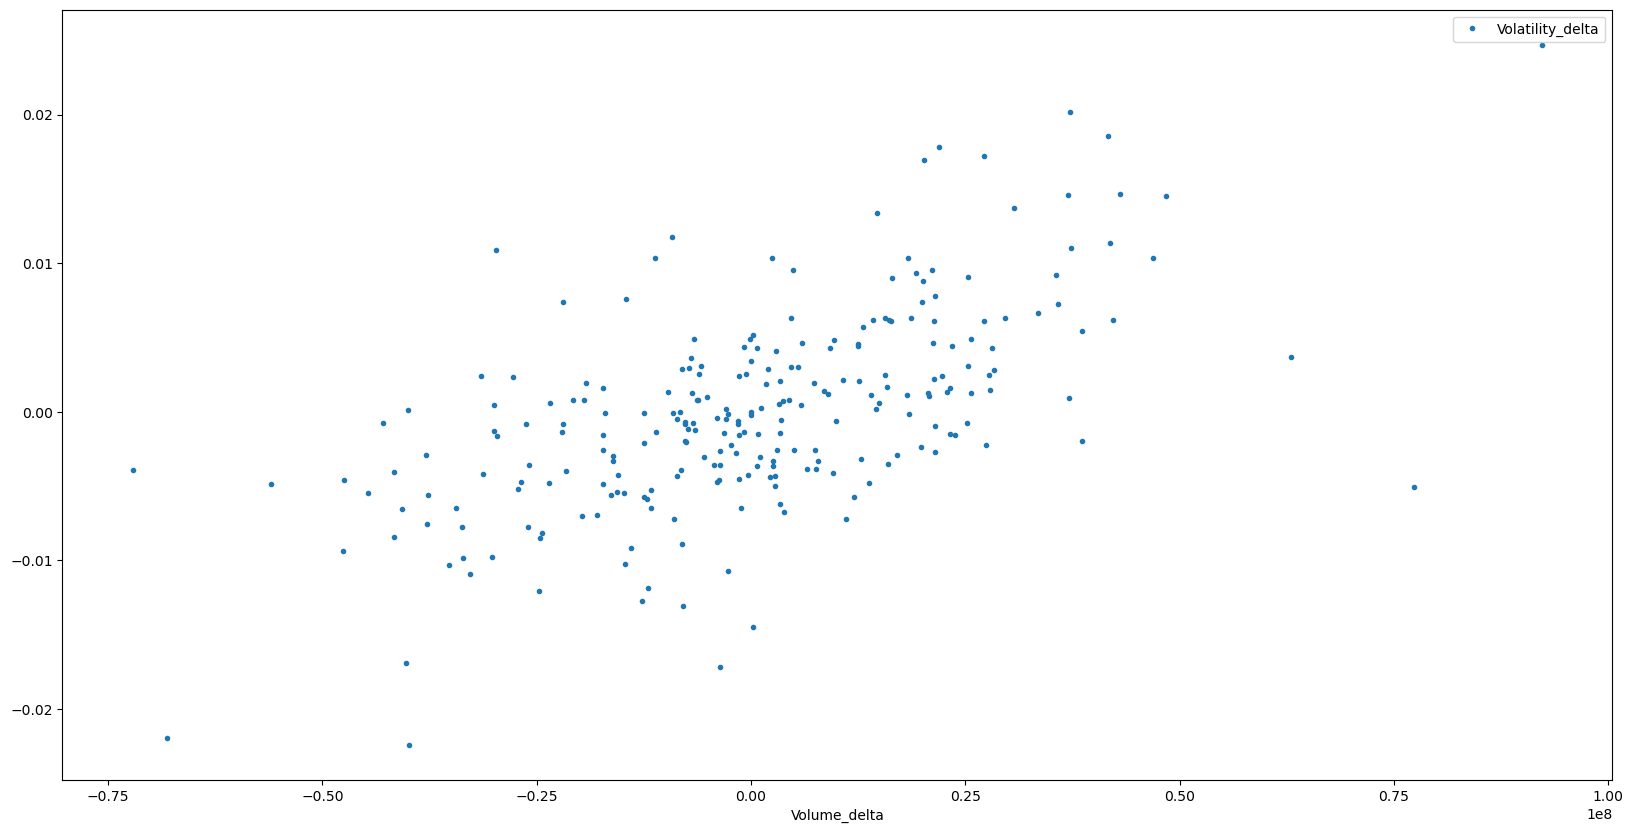

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = [20, 10]

def calculate_volatility_and_volume_delta(data):
    data['Volatility'] = (data['High'] - data['Low']) / data['Close']
    data['Volume_delta'] = data['Volume'].diff()
    data['Volatility_delta'] = data['Volatility'].diff()
    
    data['Volume_delta'] = data['Volume_delta'].fillna(0)
    data['Volatility_delta'] = data['Volatility_delta'].fillna(0)

SPY = pd.read_csv('https://raw.githubusercontent.com/ktxdev/AIM-5003/main/Midterm%20Project/1.%20Data/SPY.csv')

calculate_volatility_and_volume_delta(SPY)

SPY.plot(x='Volume_delta', y='Volatility_delta', style='.')


### Describing relationship between intraday volatility vs volume

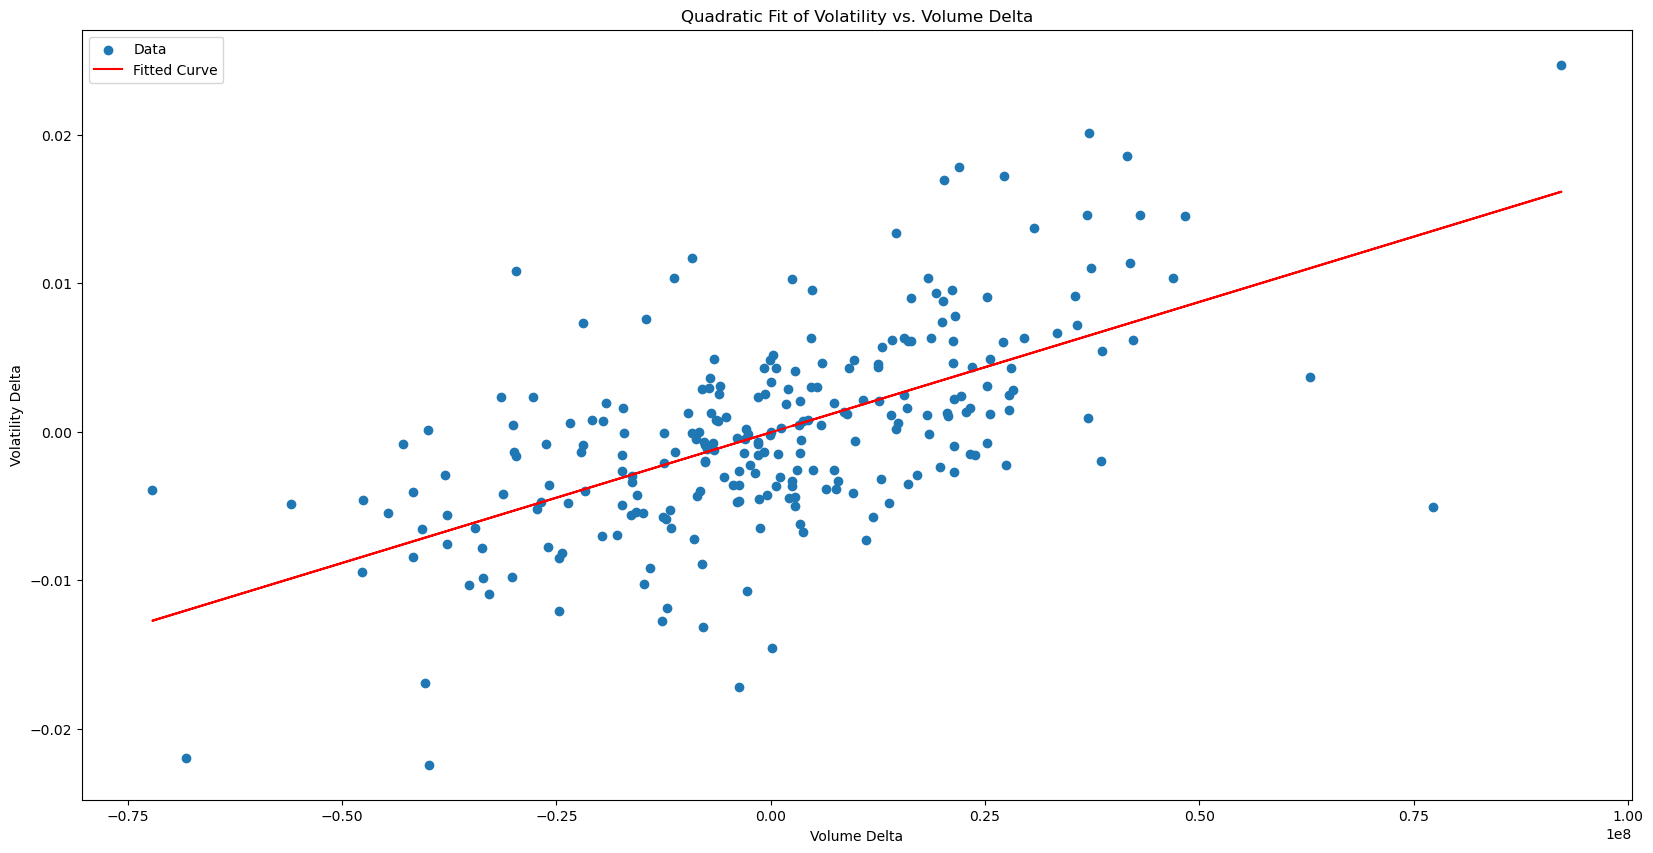

In [4]:
from scipy.optimize import curve_fit

# Define the linear function
def linear_function(x, m, b):
    return m * x + b

# Initial coefficients
initial = [-0.5, -0.25]

# Fit the model to the data
optimal_params, covariance = curve_fit(linear_function, SPY['Volume_delta'], SPY['Volatility_delta'], p0 = initial)

# Predict intraday volatility using the fitted model
predicted_volatility = linear_function(SPY['Volume_delta'], *optimal_params)

# Plot the data and the fitted curve
plt.scatter(SPY['Volume_delta'], SPY['Volatility_delta'], label='Data')
plt.plot(SPY['Volume_delta'], predicted_volatility, color='red', label='Fitted Curve')
plt.xlabel('Volume Delta')
plt.ylabel('Volatility Delta')
plt.title('Quadratic Fit of Volatility vs. Volume Delta')
plt.legend()
plt.show()

### Testing Using the last 5 years data

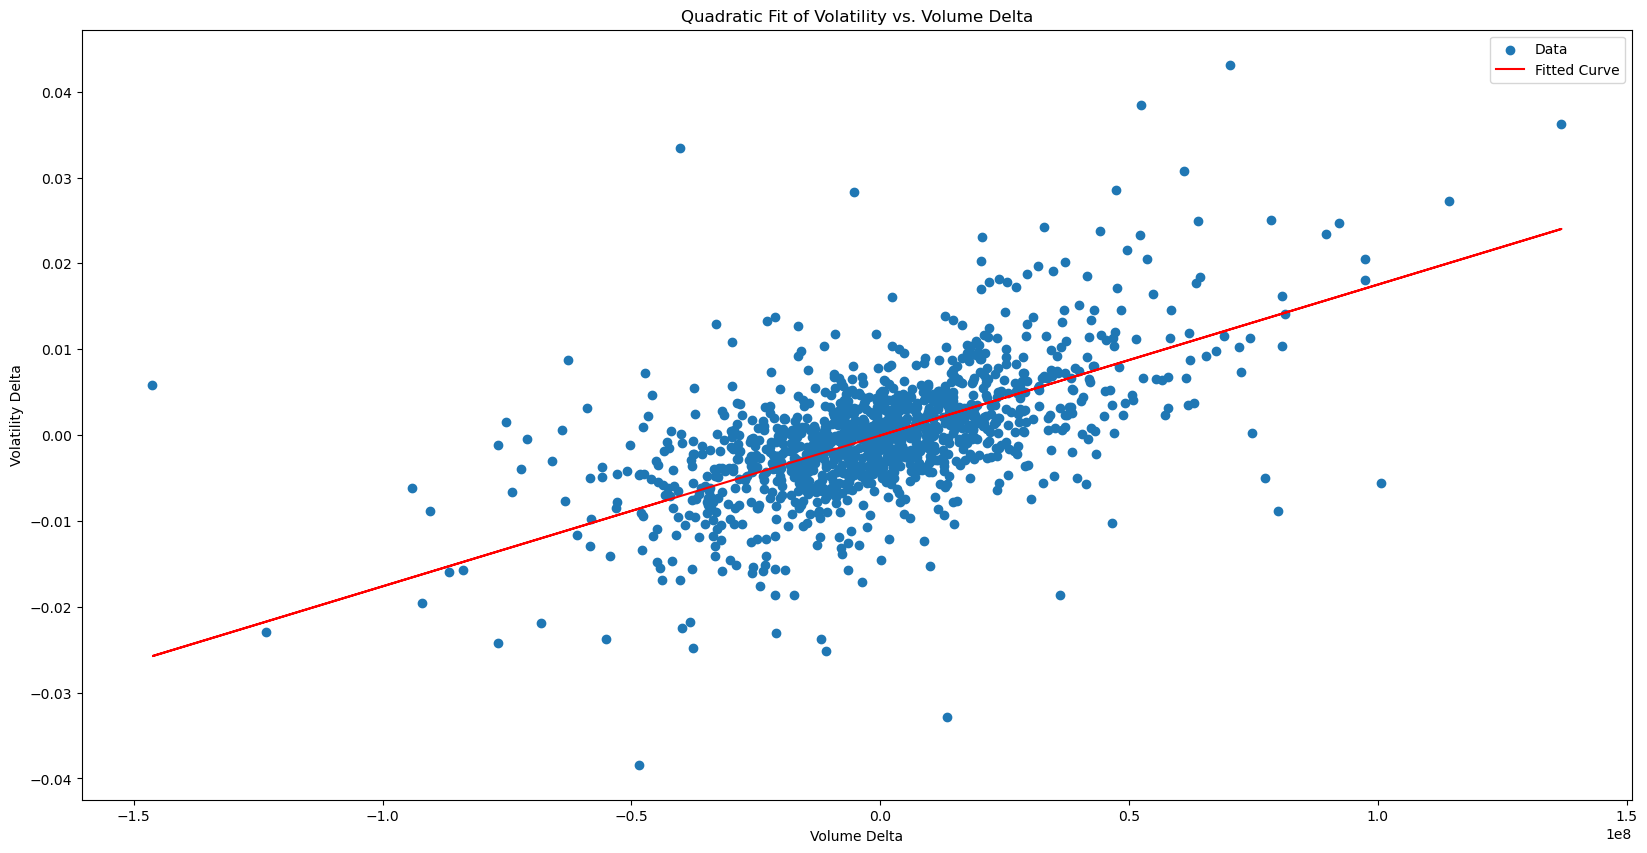

R-squared: 0.3337168633810489


In [5]:
SPY = pd.read_csv('https://raw.githubusercontent.com/ktxdev/AIM-5003/main/Midterm%20Project/1.%20Data/SPY_5_years.csv')

calculate_volatility_and_volume_delta(SPY)

# Predict intraday volatility using the fitted model
predicted_volatility = linear_function(SPY['Volume_delta'], *optimal_params)

# Plot the data and the fitted curve
plt.scatter(SPY['Volume_delta'], SPY['Volatility_delta'], label='Data')
plt.plot(SPY['Volume_delta'], predicted_volatility, color='red', label='Fitted Curve')
plt.xlabel('Volume Delta')
plt.ylabel('Volatility Delta')
plt.title('Quadratic Fit of Volatility vs. Volume Delta')
plt.legend()
plt.show()

# Using R-squared to test how well the data fits
residuals = SPY['Volatility_delta'] - predicted_volatility
sum_squared_residuals = np.sum(residuals ** 2)
sum_squared_total = np.sum((SPY['Volatility_delta'] - np.mean(SPY['Volatility_delta'])) ** 2)
r_squared = 1 - (sum_squared_residuals / sum_squared_total)
print("R-squared:", r_squared)

# Researching on SPXS EFT

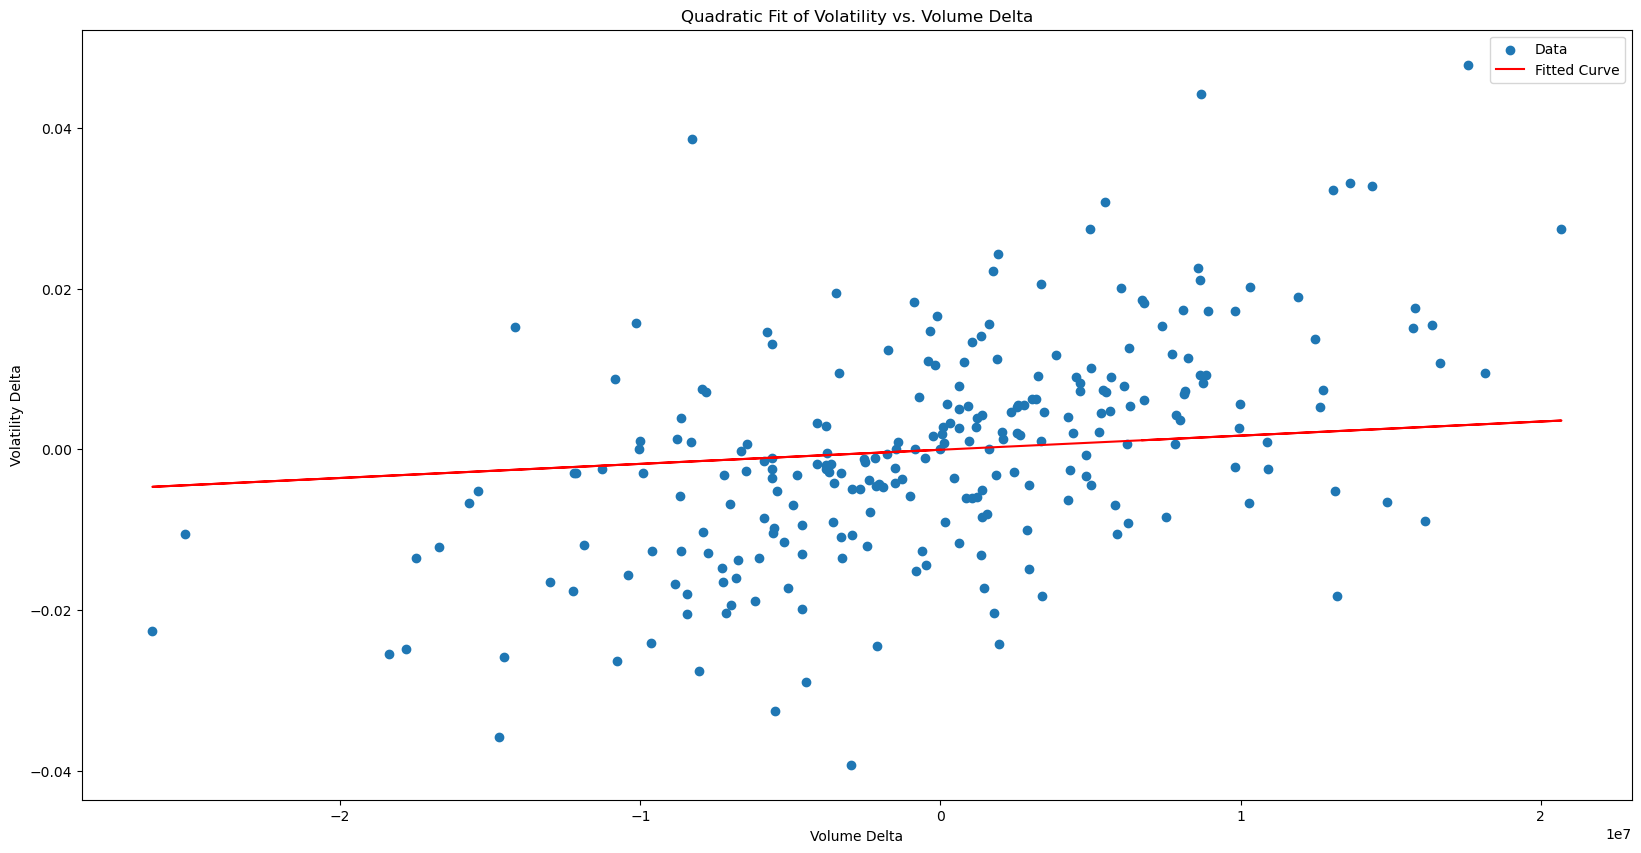

R-squared: 0.0977531699405183


In [6]:
SPXS = pd.read_csv("https://raw.githubusercontent.com/ktxdev/AIM-5003/main/Midterm%20Project/1.%20Data/SPXS.csv")

calculate_volatility_and_volume_delta(SPXS)

# Predict intraday volatility using the fitted model
predicted_volatility = linear_function(SPXS['Volume_delta'], *optimal_params)

# Plot the data and the fitted curve
plt.scatter(SPXS['Volume_delta'], SPXS['Volatility_delta'], label='Data')
plt.plot(SPXS['Volume_delta'], predicted_volatility, color='red', label='Fitted Curve')
plt.xlabel('Volume Delta')
plt.ylabel('Volatility Delta')
plt.title('Quadratic Fit of Volatility vs. Volume Delta')
plt.legend()
plt.show()

# Using R-squared to test how well the data fits
residuals = SPXS['Volatility_delta'] - predicted_volatility
sum_squared_residuals = np.sum(residuals ** 2)
sum_squared_total = np.sum((SPXS['Volatility_delta'] - np.mean(SPXS['Volatility_delta'])) ** 2)
r_squared = 1 - (sum_squared_residuals / sum_squared_total)
print("R-squared:", r_squared)

An R-squared value of 0.0977 implies that about 9.77% of the variation in the dependent variable is foreseeable from the independent variable in the regression model. Because this number is too low, we may conclude that the equation is the worst fit for SPXS EFT.

In [ ]:
# Extending research on stocks